<h1> HANDWRITTEN SIGNATURE VERIFICATION 
USING 
CONVOLUTION NEURAL NETWORK (CNN) </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle

In [2]:
train_dir = "./sign_data/Dataset/train"
test_dir = "./sign_data/Dataset/test"


In [3]:
SIZE = 224

In [10]:
import os
import glob
import cv2
import numpy as np

# Initialize lists to store dataset information
train_data_names = []
test_data_names = []
train_data = []
train_labels = []
test_data = []
test_labels = []

# Process training data
for per in os.listdir('sign_data/Dataset/train'):
    for data in glob.glob('sign_data/Dataset/train/'+per+'/*.*'):
        # Append image paths to train_data_names
        train_data_names.append(data)
        # Read, resize, and preprocess image
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        # Determine and append label (1 for genuine, 0 for forged)
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

# Convert training data to NumPy array and normalize pixel values
train_data = np.array(train_data) / 255.0
train_labels = np.array(train_labels)

# Process test data
for per in os.listdir('sign_data/Dataset/test'):
    for data in glob.glob('sign_data/Dataset/test/'+per+'/*.*'):
        # Append image paths to test_data_names
        test_data_names.append(data)
        # Read, resize, and preprocess image
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        # Determine and append label (1 for genuine, 0 for forged)
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

# Convert test data to NumPy array and normalize pixel values
test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

# Print dataset information
print("Training dataset:")
print("Number of samples:", len(train_data))
print("Number of genuine signatures:", np.sum(train_labels == 1))
print("Number of forged signatures:", np.sum(train_labels == 0))
print()
print("Test dataset:")
print("Number of samples:", len(test_data))
print("Number of genuine signatures:", np.sum(test_labels == 1))
print("Number of forged signatures:", np.sum(test_labels == 0))


Training dataset:
Number of samples: 1649
Number of genuine signatures: 762
Number of forged signatures: 887

Test dataset:
Number of samples: 500
Number of genuine signatures: 248
Number of forged signatures: 252


In [5]:
import pickle

# Save train_data_names
with open('./train_data_names.pkl', 'wb') as fp:
    pickle.dump(train_data_names, fp)

# Save test_data_names
with open('./test_data_names.pkl', 'wb') as fp:
    pickle.dump(test_data_names, fp)


In [6]:
# Categorical labels
#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

<h1> Inception_v3 - ADAM </h1>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 batch_normalization_282 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                      

C:\Softwares\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40
116/116 [==============================] - 32s 154ms/step - loss: 2.6457 - accuracy: 0.5910 - val_loss: 2.5212 - val_accuracy: 0.6424
Epoch 2/40
116/116 [==============================] - 13s 112ms/step - loss: 2.6358 - accuracy: 0.6326 - val_loss: 2.4701 - val_accuracy: 0.6828
Epoch 3/40
116/116 [==============================] - 14s 117ms/step - loss: 2.5633 - accuracy: 0.6378 - val_loss: 2.3555 - val_accuracy: 0.7293
Epoch 4/40
116/116 [==============================] - 13s 116ms/step - loss: 2.4254 - accuracy: 0.6915 - val_loss: 2.2310 - val_accuracy: 0.7818
Epoch 5/40
116/116 [==============================] - 14s 116ms/step - loss: 2.2873 - accuracy: 0.7123 - val_loss: 2.0527 - val_accuracy: 0.7919
Epoch 6/40
116/116 [==============================] - 14s 118ms/step - loss: 2.1559 - accuracy: 0.7192 - val_loss: 1.9471 - val_accuracy: 0.8020
Epoch 7/40
116/116 [==============================] - 14s 117ms/step - loss: 1.9695 - accuracy: 0.7522 - val_loss: 1.8024 - val_ac

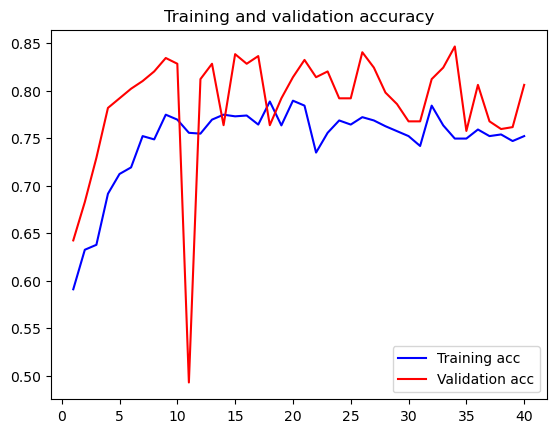

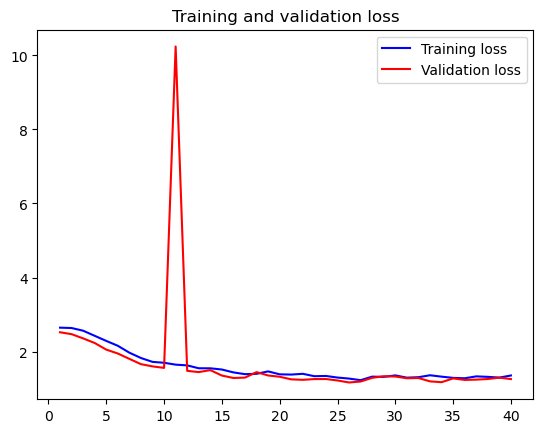

16/16 [==============================] - 3s 175ms/step


In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define constants
SIZE = 224
INPUT_SHAPE = (SIZE, SIZE, 3)
EPOCHS = 40
BATCH_SIZE = 10
NUM_CLASSES = 2

# Load InceptionV3 base model
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze the layers in the base model
base_model.trainable = False

# Create the model
model = models.Sequential()
data_augmentation = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
optimizer = optimizers.Nadam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display model summary
model.summary()

# Split the data into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=42)

# Train the model with data augmentation
history = model.fit(data_augmentation.flow(train_data, train_labels, batch_size=BATCH_SIZE), epochs=EPOCHS, validation_data=(val_data, val_labels))

# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    # Plot loss
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

# Plot the training history
plot_training_history(history)

# Save intermediate layer outputs
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_Nadam_train', intermediate_output_train)
np.save('./InceptionV3_Nadam_test', intermediate_output_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load the extracted features
train_features = np.load('./InceptionV3_Nadam_train.npy')
test_features = np.load('./InceptionV3_Nadam_test.npy')



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Adjust the number of components as needed
train_features_pca = pca.fit_transform(train_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

# Convert train_labels to 1D array
train_labels_1d = np.argmax(train_labels, axis=1)

# Ensemble Method - Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(train_features_pca, train_labels_1d)  # Use the PCA-transformed features

# Make predictions on the test set
predictions = gb_model.predict(test_features_pca)  # Use the PCA-transformed features


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Test accuracy: {accuracy}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(train_features, train_labels_1d)

# Make predictions on the test set
predictions = rf_model.predict(test_features)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Test accuracy: {accuracy}")
